<a href="https://colab.research.google.com/github/Brobrian61/Ai-projects/blob/main/Credit_card_dataset_SVM_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing librairies

import pandas as pd
import numpy as np

# Scikit-learn library: For SVM
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

import itertools

# Matplotlib library to plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Library for the statistic data vizualisation
import seaborn

%matplotlib inline

In [4]:
data = pd.read_csv('/content/creditcard.csv') # Reading the file .csv
df = pd.DataFrame(data) # Converting data to Panda DataFrame

In [5]:
df = pd.DataFrame(data) # Converting data to Panda DataFrame

In [6]:
df.describe() # Description of statistic features (Sum, Average, Variance, minimum, 1st quartile, 2nd quartile, 3rd Quartile and Maximum)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170463.000000,170463.000000,170463.000000,170463.000000,170463.000000,170463.000000,170463.000000,170463.000000,170463.000000,170463.000000,...,170462.000000,170462.000000,170462.000000,170462.000000,170462.000000,170462.000000,170462.000000,170462.000000,170462.000000,170462.000000
mean,60945.692185,-0.171418,0.041438,0.496009,0.118163,-0.177346,0.058682,-0.081195,0.032564,0.019095,...,-0.028654,-0.084279,-0.022592,0.009210,0.092750,0.012698,0.002063,0.002476,87.323837,0.002112
std,27706.565970,1.850499,1.611466,1.382129,1.371813,1.338482,1.295161,1.208874,1.228228,1.152669,...,0.743809,0.667001,0.584789,0.598609,0.465168,0.490741,0.392259,0.307549,246.031624,0.045907
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,41172.500000,-0.987177,-0.538322,-0.061200,-0.742708,-0.829775,-0.690531,-0.586555,-0.162257,-0.660021,...,-0.230739,-0.546821,-0.170281,-0.332191,-0.195154,-0.330339,-0.065088,-0.026686,5.470000,0.000000
50%,60665.000000,-0.185295,0.110233,0.625232,0.124920,-0.227397,-0.202146,-0.032314,0.056915,-0.079157,...,-0.054634,-0.067189,-0.036388,0.059690,0.136222,-0.059032,0.008744,0.021198,21.860000,0.000000
75%,78493.000000,1.183845,0.804500,1.298406,0.938294,0.372807,0.449766,0.462061,0.351272,0.641997,...,0.127892,0.362294,0.098484,0.415848,0.399693,0.273055,0.089745,0.078337,76.677500,0.000000
max,120194.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


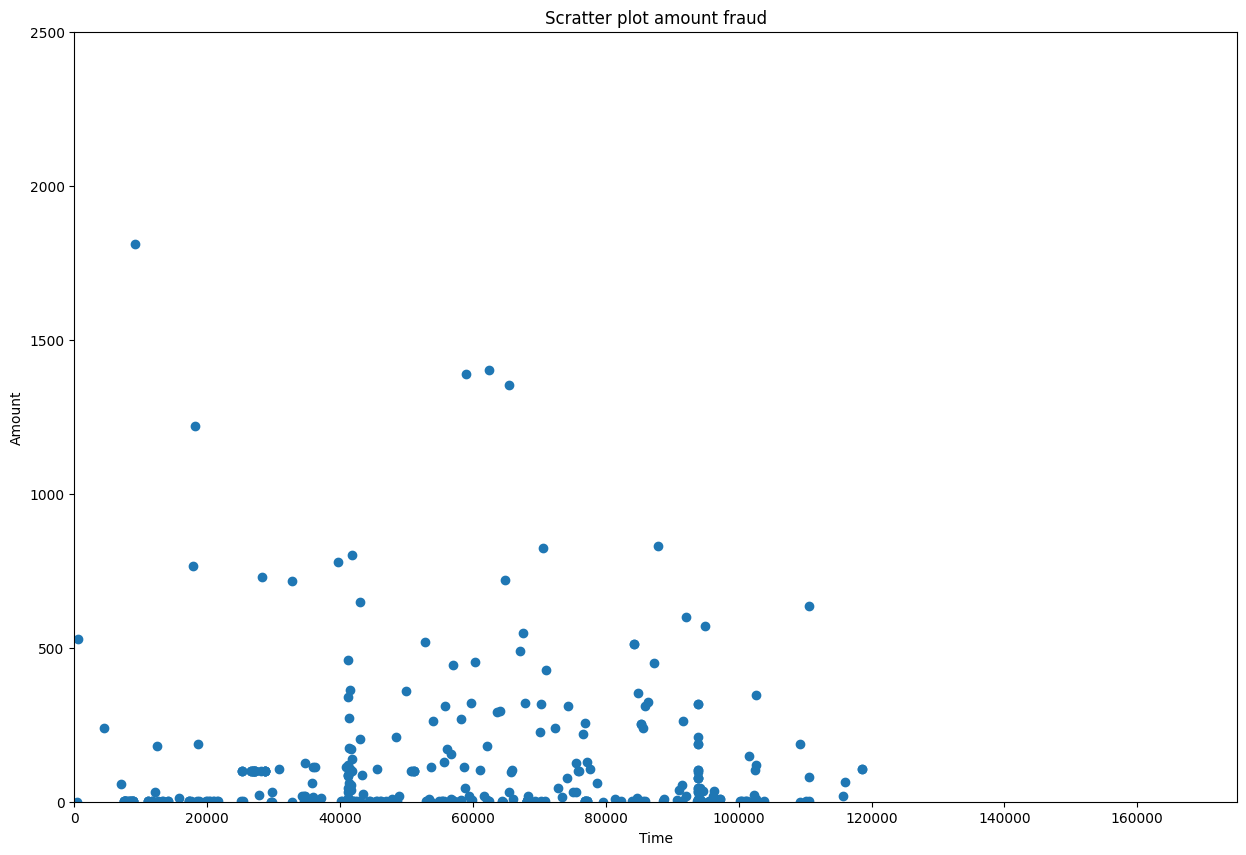

In [7]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [10]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only '+ str(nb_big_fraud) + ' frauds where the amount was bigger than 1000 over ' + str(df_fraud.shape[0]) + ' frauds')

There are only 5 frauds where the amount was bigger than 1000 over 360 frauds


In [9]:
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('There are only '+ str(number_fraud) + ' frauds in the original dataset, even though there are ' + str(number_no_fraud) +' no frauds in the dataset.')

There are only 360 frauds in the original dataset, even though there are 170102 no frauds in the dataset.


In [11]:
print("The accuracy of the classifier then would be : "+ str((284315-492)/284315)+ " which is the number of good classification over the number of tuple to classify")

The accuracy of the classifier then would be : 0.998269524998681 which is the number of good classification over the number of tuple to classify


In [12]:
df_corr = df.corr() # Calculation of the correlation coefficients in pairs, with the default method:
                    # Pearson, Standard Correlation Coefficient

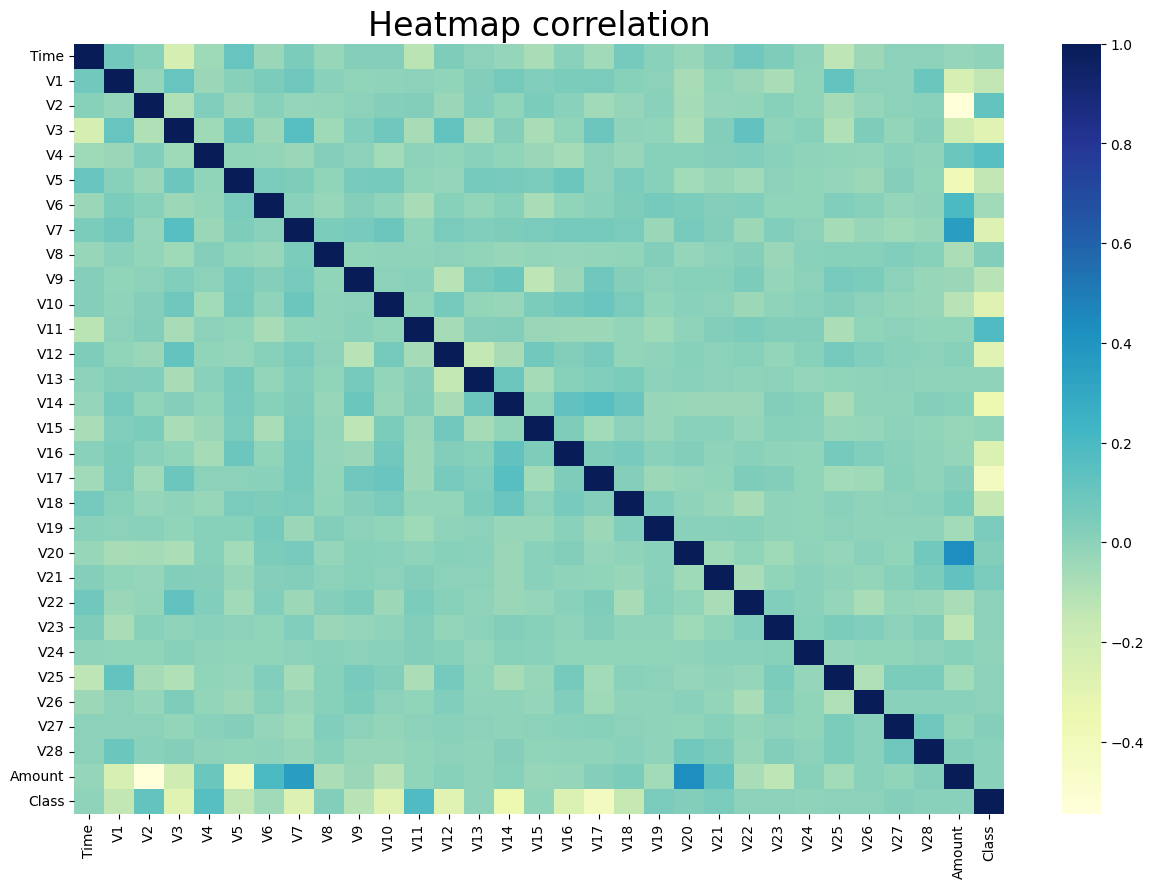

In [13]:
plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [14]:
rank = df_corr['Class'] # Retrieving the correlation coefficients per feature in relation to the feature class
df_rank = pd.DataFrame(rank)
df_rank = np.abs(df_rank).sort_values(by='Class',ascending=False) # Ranking the absolute values of the coefficients
                                                                  # in descending order
df_rank.dropna(inplace=True) # Removing Missing Data (not a number)

In [18]:
# We seperate ours data in two groups : a train dataset and a test dataset

# First we build our train dataset
df_train_all = df[0:150000] # We cut in two the original dataset
df_train_1 = df_train_all[df_train_all['Class'] == 1] # We seperate the data which are the frauds and the no frauds
df_train_0 = df_train_all[df_train_all['Class'] == 0]
print('In this dataset, we have ' + str(len(df_train_1)) +" frauds so we need to take a similar number of non-fraud")

df_sample=df_train_0.sample(300)
# We gather the frauds with the no frauds using pd.concat instead of the deprecated append
df_train = pd.concat([df_train_1, df_sample])
df_train = df_train.sample(frac=1) # Then we mix our dataset

In this dataset, we have 293 frauds so we need to take a similar number of non-fraud


In [19]:
X_train = df_train.drop(['Time', 'Class'],axis=1) # We drop the features Time (useless), and the Class (label)
y_train = df_train['Class'] # We create our label
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [28]:
# Import SimpleImputer
from sklearn.impute import SimpleImputer

In [20]:
############################## with all the test dataset to see if the model learn correctly ##################
df_test_all = df[150000:]

X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

In [29]:
# Impute missing values using the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_test_all_imputed = imputer.fit_transform(X_test_all)

In [21]:
X_train_rank = df_train[df_rank.index[1:11]] # We take the first ten ranked features
X_train_rank = np.asarray(X_train_rank)

In [30]:
# %%
X_train_rank = df_train[df_rank.index[1:11]] # We take the first ten ranked features
X_train_rank = np.asarray(X_train_rank)
# %%

In [22]:
############################## with all the test dataset to see if the model learn correctly ##################
X_test_all_rank = df_test_all[df_rank.index[1:11]]
X_test_all_rank = np.asarray(X_test_all_rank)
y_test_all = np.asarray(y_test_all)

In [23]:
class_names=np.array(['0','1']) # Binary label, Class = 1 (fraud) and Class = 0 (no fraud)

In [24]:
# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [25]:
classifier = svm.SVC(kernel='linear') # We set a SVM classifier, the default SVM Classifier (Kernel = Radial Basis Function)


In [26]:
classifier.fit(X_train, y_train) # Then we train our model, with our balanced da

SVC(kernel='linear')

In [32]:
# %%
prediction_SVM_all = classifier.predict(X_test_all_imputed) #And finally, we predict our data using the imputed test set

In [47]:
# %%
############################## with all the test dataset to see if the model learn correctly ##################
df_test_all = df[150000:]

# Drop rows where the 'Class' is NaN to ensure y_test_all has no missing values
# This needs to happen before separating X and y to keep them aligned
df_test_all = df_test_all.dropna(subset=['Class'])

X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']

# Ensure both X and y are NumPy arrays at this point
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

# Impute missing values using the mean for the features (X_test_all)
# The imputer should be fitted on the training data or fitted on all data before splitting,
# but for simplicity here, we'll fit on the test data as done in the original code.
# A more robust approach would involve fitting the imputer on X_train and transforming X_test_all.
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_test_all_imputed = imputer.fit_transform(X_test_all)

# Now predict using the imputed test set
prediction_SVM_all = classifier.predict(X_test_all_imputed)

# Now y_test_all and prediction_SVM_all should have the same number of samples

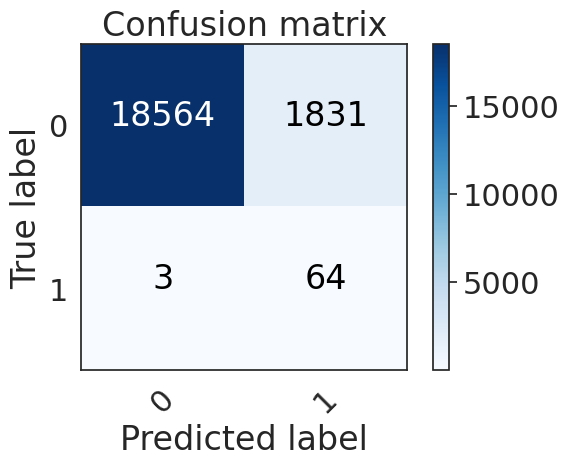

In [48]:
cm = confusion_matrix(y_test_all, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

In [49]:
print('Our criterion give a result of '
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9462531930320054


In [50]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 64 frauds / 67 total frauds.

So, the probability to detect a fraud is 0.9552238805970149
the accuracy is : 0.9103704427719675


In [51]:
classifier_b = svm.SVC(kernel='linear',class_weight={0:0.60, 1:0.40})

In [52]:
classifier_b.fit(X_train, y_train) # Then we train our model, with our balanced data train.

SVC(class_weight={0: 0.6, 1: 0.4}, kernel='linear')

In [53]:
prediction_SVM_b_all = classifier_b.predict(X_test_all) #We predict all the data set.

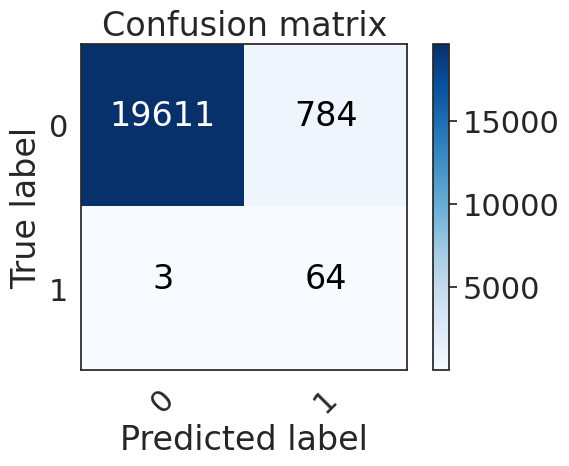

In [54]:
cm = confusion_matrix(y_test_all, prediction_SVM_b_all)
plot_confusion_matrix(cm,class_names)

In [55]:
print('Our criterion give a result of '
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9564867967853041


In [56]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 64 frauds / 67 total frauds.

So, the probability to detect a fraud is 0.9552238805970149
the accuracy is : 0.9615384615384616


In [60]:
# Import SimpleImputer if not already imported
from sklearn.impute import SimpleImputer
import numpy as np

# Assume classifier_b is already defined and trained on X_train_rank and y_train
classifier_b.fit(X_train_rank, y_train) # Then we train our model, with our balanced data train.

# Create and fit a NEW SimpleImputer specifically for the ranked features
# Fit the imputer on the training data for the ranked features
imputer_rank = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_rank.fit(X_train_rank)

# Transform the test data for ranked features using the imputer fitted on ranked training data
X_test_all_rank_imputed = imputer_rank.transform(X_test_all_rank)


# And finally, we predict our data test using the imputed ranked features.
prediction_SVM = classifier_b.predict(X_test_all_rank_imputed)

In [62]:
# Import SimpleImputer if not already imported
from sklearn.impute import SimpleImputer
import numpy as np

# Assume classifier_b is already defined and trained on X_train_rank and y_train
# Re-train the classifier on the potentially updated X_train_rank and y_train if previous cells were re-run
# classifier_b.fit(X_train_rank, y_train) # This line might not be necessary if already trained in a previous cell

############################## with all the test dataset to see if the model learn correctly ##################
df_test_all = df[150000:].copy() # Use .copy() to avoid SettingWithCopyWarning later

# Drop rows where the 'Class' is NaN to ensure consistency between features and target
# This needs to happen BEFORE separating X and y to keep them aligned
df_test_all.dropna(subset=['Class'], inplace=True)

# Select the ranked features from the cleaned test DataFrame
X_test_all_rank = df_test_all[df_rank.index[1:11]]

# Create the target variable from the cleaned test DataFrame
y_test_all = df_test_all['Class']

# Ensure both X and y are NumPy arrays at this point
X_test_all_rank = np.asarray(X_test_all_rank)
y_test_all = np.asarray(y_test_all)

# Create and fit a NEW SimpleImputer specifically for the ranked features
# It's generally better to fit the imputer on the training data
# However, following the original code's pattern, we'll fit on the test data here.
# For a more robust solution, fit imputer_rank on X_train_rank and transform X_test_all_rank.
imputer_rank = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_rank.fit(X_test_all_rank) # Fit the imputer on the test data for ranked features

# Transform the test data for ranked features using the imputer fitted on test data
X_test_all_rank_imputed = imputer_rank.transform(X_test_all_rank)

# And finally, we predict our data test using the imputed ranked features.
prediction_SVM = classifier_b.predict(X_test_all_rank_imputed)

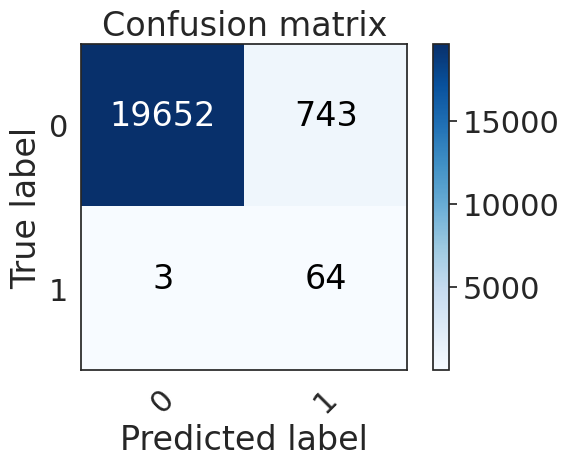

In [63]:
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm,class_names)

In [64]:
print('Our criterion give a result of '
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9568875396256914


In [65]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 64 frauds / 67 total frauds.

So, the probability to detect a fraud is 0.9552238805970149
the accuracy is : 0.9635421757403968


In [66]:
classifier_b.fit(X_train_rank, y_train) # Then we train our model, with our balanced data train.
prediction_SVM = classifier_b.predict(X_test_all_rank) #And finally, we predict our data tes

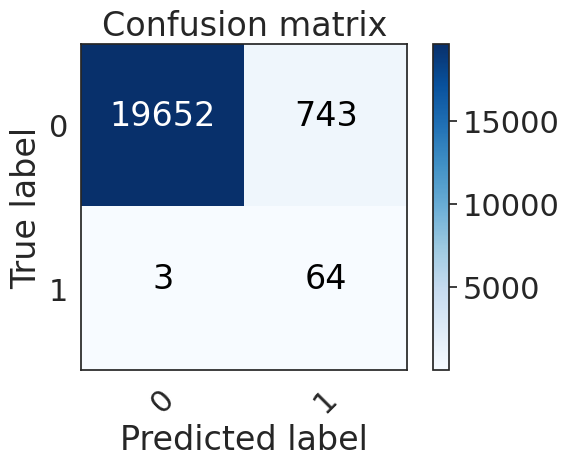

In [70]:
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm,class_names)

In [71]:
print('Our criterion give a result of '
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9568875396256914


In [72]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 64 frauds / 67 total frauds.

So, the probability to detect a fraud is 0.9552238805970149
the accuracy is : 0.9635421757403968
